In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Data Pre- Processing</h2>

In [2]:
metrics = pd.read_csv("metrics.csv")

In [3]:
metrics.head()

,athlete_id,date,metric,value
0,1,2016-05-01,hip_mobility,36
1,1,2016-05-02,hip_mobility,36
2,1,2016-05-03,hip_mobility,56
3,1,2016-05-04,hip_mobility,24
4,1,2016-05-05,hip_mobility,35


In [4]:
metrics.describe(include='all')

,athlete_id,date,metric,value
count,43800.00000,43800,43800,43800.000000
unique,NaN,730,2,NaN
top,NaN,2017-11-18,groin_squeeze,NaN
freq,NaN,60,21900,NaN
mean,15.50000,NaN,NaN,124.974338
std,8.65554,NaN,NaN,107.841666
min,1.00000,NaN,NaN,-108.000000
25%,8.00000,NaN,NaN,39.000000
50%,15.50000,NaN,NaN,56.000000
75%,23.00000,NaN,NaN,213.000000


In [5]:
metrics.dtypes

athlete_id     int64
date          object
metric        object
value          int64
dtype: object

In [6]:
metrics['date'] = metrics['date'].astype('datetime64[ns]')
metrics.dtypes

athlete_id             int64
date          datetime64[ns]
metric                object
value                  int64
dtype: object

In [7]:
workload = pd.read_csv("game_workload.csv")

In [8]:
workload.head()

,athlete_id,date,game_workload
0,1,2016-05-05,402
1,1,2016-05-08,365
2,1,2016-05-11,457
3,1,2016-05-16,405
4,1,2016-05-20,407


In [9]:
workload.describe(include='all')

,athlete_id,date,game_workload
count,2400.000000,2400,2400.000000
unique,NaN,706,NaN
top,NaN,2018-03-25,NaN
freq,NaN,9,NaN
mean,15.649167,NaN,400.481667
std,8.735438,NaN,47.991824
min,1.000000,NaN,225.000000
25%,8.000000,NaN,368.000000
50%,16.000000,NaN,400.000000
75%,23.000000,NaN,433.250000


In [10]:
workload['date'] = workload['date'].astype('datetime64[ns]')
workload.dtypes

athlete_id                int64
date             datetime64[ns]
game_workload             int64
dtype: object

In [11]:
injuries = pd.read_csv("injuries.csv")

In [12]:
injuries.head()

,athlete_id,date
0,1,2016-05-11
1,1,2016-05-16
2,1,2016-07-28
3,1,2016-11-11
4,1,2016-12-16


In [13]:
injuries.describe(include = 'all')

,athlete_id,date
count,137.000000,137
unique,NaN,126
top,NaN,2016-05-16
freq,NaN,4
mean,15.605839,NaN
std,9.653068,NaN
min,1.000000,NaN
25%,6.000000,NaN
50%,18.000000,NaN
75%,24.000000,NaN


In [14]:
injuries['date'] = injuries['date'].astype('datetime64[ns]')
injuries.dtypes

athlete_id             int64
date          datetime64[ns]
dtype: object

In [15]:
"""Creating a new column named injury with all values as yes"""
injuries["injury"] = "Yes"

In [16]:
injuries.head()

,athlete_id,date,injury
0,1,2016-05-11,Yes
1,1,2016-05-16,Yes
2,1,2016-07-28,Yes
3,1,2016-11-11,Yes
4,1,2016-12-16,Yes


In [17]:
"""Merging the workload and injuries dataframes"""
games_data = pd.merge(workload,injuries,  how='left', left_on=['athlete_id','date'], right_on = ['athlete_id','date'])

In [18]:
"""Replacing the NANs with No as the value in injury column"""
games_data["injury"].fillna("No", inplace = True)
#playersData["game_workload"].fillna(0, inplace = True)


Created a new column for recording the injury on the days games were played (as indicated by workload)

In [19]:
games_data.head()

,athlete_id,date,game_workload,injury
0,1,2016-05-05,402,No
1,1,2016-05-08,365,No
2,1,2016-05-11,457,Yes
3,1,2016-05-16,405,Yes
4,1,2016-05-20,407,No


In [20]:
metrics.head()

,athlete_id,date,metric,value
0,1,2016-05-01,hip_mobility,36
1,1,2016-05-02,hip_mobility,36
2,1,2016-05-03,hip_mobility,56
3,1,2016-05-04,hip_mobility,24
4,1,2016-05-05,hip_mobility,35


In [21]:
"""Recording metric type as two seperate columns i.e transposing the groin_squeeze and hip_mobility rows into columns"""
new_metrics_df = metrics.pivot_table('value', ['athlete_id', 'date'], 'metric').reset_index()

In [22]:
new_metrics_df.head()

metric,athlete_id,date,groin_squeeze,hip_mobility
0,1,2016-05-01,297,36
1,1,2016-05-02,274,36
2,1,2016-05-03,291,56
3,1,2016-05-04,260,24
4,1,2016-05-05,284,35


In [23]:
new_metrics_df.shape

(21900, 4)

In [24]:
"""Merging the necessary columns from all the tables into one final dataframe for further analysis"""
final_data = pd.merge(games_data,new_metrics_df,  how='left', left_on=['athlete_id','date'], right_on = ['athlete_id','date'])

In [25]:
final_data.shape

(2400, 6)

In [26]:
final_data.head()

,athlete_id,date,game_workload,injury,groin_squeeze,hip_mobility
0,1,2016-05-05,402,No,284,35
1,1,2016-05-08,365,No,250,41
2,1,2016-05-11,457,Yes,331,33
3,1,2016-05-16,405,Yes,260,38
4,1,2016-05-20,407,No,378,60


Creating new column named <b>rest_period</b> i.e difference between two consecutive games played by a player

In [27]:
final_data['rest_period'] = final_data.groupby('athlete_id')['date'].diff()

In [28]:
final_data.head()

,athlete_id,date,game_workload,injury,groin_squeeze,hip_mobility,rest_period
0,1,2016-05-05,402,No,284,35,NaT
1,1,2016-05-08,365,No,250,41,3 days
2,1,2016-05-11,457,Yes,331,33,3 days
3,1,2016-05-16,405,Yes,260,38,5 days
4,1,2016-05-20,407,No,378,60,4 days


Since the data for all the players was given from the date 2016-05-01, the resting period for the first game played by each player is taken as the difference between their first game and the date 2016-05-01.

In [29]:
first_day = '2016-05-01'
date_object = pd.to_datetime(first_day)

In [30]:
final_data["rest_period"].fillna(final_data['date'] - date_object, inplace = True)

In [31]:
final_data.head()

,athlete_id,date,game_workload,injury,groin_squeeze,hip_mobility,rest_period
0,1,2016-05-05,402,No,284,35,4 days
1,1,2016-05-08,365,No,250,41,3 days
2,1,2016-05-11,457,Yes,331,33,3 days
3,1,2016-05-16,405,Yes,260,38,5 days
4,1,2016-05-20,407,No,378,60,4 days


In [32]:
"""Converting the column into day format"""
final_data['rest_period'] = final_data['rest_period'].astype('timedelta64[D]')

In [33]:
final_data.head()

,athlete_id,date,game_workload,injury,groin_squeeze,hip_mobility,rest_period
0,1,2016-05-05,402,No,284,35,4.0
1,1,2016-05-08,365,No,250,41,3.0
2,1,2016-05-11,457,Yes,331,33,3.0
3,1,2016-05-16,405,Yes,260,38,5.0
4,1,2016-05-20,407,No,378,60,4.0


In [34]:
"""Checking for correlation between the attributes (columns)"""
final_data.corr()

,athlete_id,game_workload,groin_squeeze,hip_mobility,rest_period
athlete_id,1.000000,-0.030159,-0.051175,-0.014437,-0.016292
game_workload,-0.030159,1.000000,-0.022571,0.000956,-0.023001
groin_squeeze,-0.051175,-0.022571,1.000000,-0.001996,0.039563
hip_mobility,-0.014437,0.000956,-0.001996,1.000000,0.006614
rest_period,-0.016292,-0.023001,0.039563,0.006614,1.000000


<h2> Statistical Analysis</h2>

Preparing the dataframe for statistical analysis/ machine learning by adding/removing the categorical variables.

In [35]:
final_data.injury.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace = True)
final_data = final_data[['injury','athlete_id','date','game_workload','groin_squeeze','hip_mobility','rest_period']]

In [36]:
final_data.head()

,injury,athlete_id,date,game_workload,groin_squeeze,hip_mobility,rest_period
0,0,1,2016-05-05,402,284,35,4.0
1,0,1,2016-05-08,365,250,41,3.0
2,1,1,2016-05-11,457,331,33,3.0
3,1,1,2016-05-16,405,260,38,5.0
4,0,1,2016-05-20,407,378,60,4.0


In [37]:
"""Creating dummy variables for categorical Athelete Ids"""
dummy_variables = pd.get_dummies(final_data['athlete_id'])
ready_data = pd.concat([final_data,dummy_variables], axis=1)

In [38]:
ready_data.head()

,injury,athlete_id,date,game_workload,groin_squeeze,hip_mobility,rest_period,1,2,3,...,21,22,23,24,25,26,27,28,29,30
0,0,1,2016-05-05,402,284,35,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2016-05-08,365,250,41,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-05-11,457,331,33,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-05-16,405,260,38,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2016-05-20,407,378,60,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
ready_data.drop('athlete_id', axis = 1, inplace= True)
ready_data.drop('date', axis = 1, inplace = True)

In [40]:
ready_data.head()

,injury,game_workload,groin_squeeze,hip_mobility,rest_period,1,2,3,4,5,...,21,22,23,24,25,26,27,28,29,30
0,0,402,284,35,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,365,250,41,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,457,331,33,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,405,260,38,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,407,378,60,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
"""Assiging the dependent variable (0 0r 1 to be predicted as class)"""
y = ready_data.loc[:,'injury'].values

In [42]:
"""required for stats model only"""
y = y.reshape(-1,1)

In [43]:
y.shape

(2400, 1)

In [44]:
X = ready_data.iloc[:, 1:35 ].values

In [45]:
X.shape

(2400, 34)

In [46]:
"""Applying Logistic Regression model to identify the impacting variables using Maximum Liklehood and P-values"""
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.193348
         Iterations: 35
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.117     
Dependent Variable: y                AIC:              996.0700  
Date:               2020-02-05 02:57 BIC:              1192.6996 
No. Observations:   2400             Log-Likelihood:   -464.03   
Df Model:           33               LL-Null:          -525.28   
Df Residuals:       2366             LLR p-value:      3.2402e-12
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     35.0000                                      
-----------------------------------------------------------------
         Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------
x1       -0.0007     0.0020 -0.3399 0.7339     -0.0045     0.0032
x2        0.0074     0.0019  4.0002 0.0001      0.0038     0.0111
x3       -0.0024     0.0091 -0.2667 

/Users/swathikiran/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [47]:
"""Applying ststs model to identify the impacting variables using ordinary Leasts square method for p-value"""
import statsmodels.api as sm
logit_model=sm.OLS(y,X)
result=logit_model.fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.031    
Dependent Variable: y                AIC:                -243.6583
Date:               2020-02-05 02:57 BIC:                -47.0287 
No. Observations:   2400             Log-Likelihood:     155.83   
Df Model:           33               F-statistic:        3.354    
Df Residuals:       2366             Prob (F-statistic): 4.92e-10 
R-squared:          0.045            Scale:              0.052159 
---------------------------------------------------------------------
        Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
---------------------------------------------------------------------
x1     -0.0000      0.0001    -0.3858    0.6997    -0.0002     0.0002
x2      0.0004      0.0001     3.9425    0.0001     0.0002     0.0006
x3     -0.0000      0.0005    -0.0202    0.9838    -0.0009     0.0009
x4     -0.0030      0.0005    -5.6423    0.0000    -0.0040    

<h2>Balancing the classes in the dataset</h2>

In [48]:
"""From exploratory data analysis we know that there are only 137 injured cases out of 2400.
Therefore, we will use over sampling technique to increase the injured cases 
and hence bringing the balance between both the categoreies in the datset"""

'From exploratory data analysis we know that there are only 137 injured cases out of 2400.\nTherefore, we will use over sampling technique to increase the injured cases \nand hence bringing the balance between both the categoreies in the datset'

Text(0,0.5,'Resting_days')

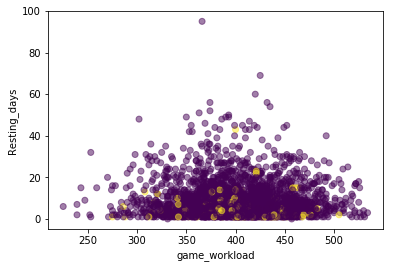

In [49]:
"""Visualising the data in form of number of cases in each class"""
plt.scatter(ready_data['game_workload'], ready_data['rest_period'],
            alpha=0.5, c=ready_data.injury, cmap='viridis', label = np.unique(ready_data.injury))
plt.xlabel("game_workload")
plt.ylabel("Resting_days")

In [50]:
"""Applying oversampling technique using Synthetic Minority Oversampling Technique"""
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_new, y_new = oversample.fit_sample(X, y)

/Users/swathikiran/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/swathikiran/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/swathikiran/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality di

In [51]:
X_new.shape

(4526, 34)

Text(0,0.5,'Resting_days')

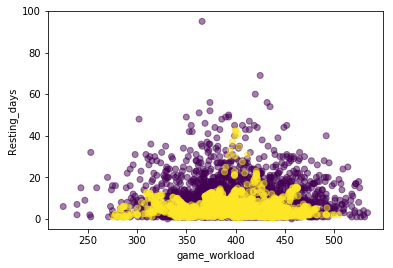

In [52]:
"""plotting the classes after over sampling the minority class"""
plt.scatter(X_new[:,0], X_new[:,3],
            alpha=0.5, c=y_new, cmap='viridis', label = np.unique(ready_data.injury))
plt.xlabel("game_workload")
plt.ylabel("Resting_days")

In [53]:
"""Applying ststs model to identify the impacting variables after balancing the classes"""
import statsmodels.api as sm
logit_model=sm.Logit(y_new,X_new)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.548601
         Iterations: 35
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.209      
Dependent Variable: y                AIC:              5033.9363  
Date:               2020-02-05 02:57 BIC:              5252.1345  
No. Observations:   4526             Log-Likelihood:   -2483.0    
Df Model:           33               LL-Null:          -3137.2    
Df Residuals:       4492             LLR p-value:      6.5541e-254
Converged:          0.0000           Scale:            1.0000     
No. Iterations:     35.0000                                       
-------------------------------------------------------------------
      Coef.     Std.Err.     z      P>|z|      [0.025      0.975]  
-------------------------------------------------------------------
x1     0.0008     0.0008    0.9120  0.3618      -0.0009      0.0024
x2     0.0103     0.0008   12.7891  0.0000       0.0087      0.0118
x3    -0.0031    

/Users/swathikiran/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [54]:
"""Applying ststs model to identify the impacting variables using ordinary Least square method"""
import statsmodels.api as sm
logit_model=sm.OLS(y_new,X_new)
result=logit_model.fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.226    
Dependent Variable: y                AIC:                5443.4275
Date:               2020-02-05 02:57 BIC:                5661.6256
No. Observations:   4526             Log-Likelihood:     -2687.7  
Df Model:           33               F-statistic:        41.11    
Df Residuals:       4492             Prob (F-statistic): 1.02e-228
R-squared:          0.232            Scale:              0.19346  
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
x1         0.0001     0.0002     0.8328   0.4050   -0.0002    0.0004
x2         0.0019     0.0001    13.0648   0.0000    0.0016    0.0022
x3        -0.0004     0.0007    -0.5879   0.5566   -0.0019    0.0010
x4        -0.0194     0.0009   -21.4388   0.0000   -0.0212   -0.0176

<h2>Building a classifier</h2>

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

In [56]:
"""Using Logistic Regression Classifer"""
from sklearn.linear_model import LogisticRegression
logitic_regressor = LogisticRegression()
logitic_regressor.fit(X_train, y_train)
y_pred = logitic_regressor.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logitic_regressor.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.72
[[453 240]
 [140 525]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       693
           1       0.69      0.79      0.73       665

    accuracy                           0.72      1358
   macro avg       0.73      0.72      0.72      1358
weighted avg       0.73      0.72      0.72      1358



/Users/swathikiran/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
"""Using Decision Tree Classifer"""
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree classifier on test set: 0.93
[[637  56]
 [ 41 624]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       693
           1       0.92      0.94      0.93       665

    accuracy                           0.93      1358
   macro avg       0.93      0.93      0.93      1358
weighted avg       0.93      0.93      0.93      1358



In [58]:
"""Using KNN Classifer"""
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of Knn classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of Knn classifier on test set: 0.85
[[511 182]
 [ 26 639]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       693
           1       0.78      0.96      0.86       665

    accuracy                           0.85      1358
   macro avg       0.86      0.85      0.85      1358
weighted avg       0.87      0.85      0.85      1358



In [59]:
"""Using Support Vector Classifer"""
from sklearn.svm import SVC
svm_classifier = SVC(gamma='auto')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print('Accuracy of Support Vector classifier on test set: {:.2f}'.format(svm_classifier.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of Support Vector classifier on test set: 0.92
[[654  39]
 [ 66 599]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       693
           1       0.94      0.90      0.92       665

    accuracy                           0.92      1358
   macro avg       0.92      0.92      0.92      1358
weighted avg       0.92      0.92      0.92      1358



Support Vector and Decision Tree classifiers are classifying more accurately compared to other classifiers with F1 scores = 0.93